In [1]:
import matplotlib.pyplot as plt
import pandas
import re
from pathlib import Path
import numpy as np
import random
import os

import Utilities

In [2]:
def SetCPList(cp_num):
    CPlist_NYC = Utilities.GetScenarioCSVList(cp_num, True, "NYC")
    CPlist_ITH = Utilities.GetScenarioCSVList(cp_num, True, "ITH")
    CPlist_ISR = Utilities.GetScenarioCSVList(cp_num, True, "ISR")
    return CPlist_NYC, CPlist_ITH, CPlist_ISR


got 29 csv from CP2 in NYC with validity: True 
got 11 csv from CP2 in ITH with validity: True 
got 31 csv from CP2 in ISR with validity: True 
[154, 160, 235, 165, 278, 280, 88, 74, 96, 103, 118, 124, 134, 128, 120, 77, 76, 99, 9999, 136, 163, 283, 159, 93, 100, 9999, 472, 230, 84]
[123, 127, 151, 208, 122, 167, 71, 188, 110, 71, 98, 114, 166, 97, 9999, 9999, 288, 73, 80, 257, 91, 9999, 321, 110, 203, 143, 226, 194, 104]
['B', 'B', 'B', 'A', 'B', 'B', 'B', 'A', 'A', 'B', 'B', 'B', 'A', 'B', 'A', 'A', 'A', 'B', 'B', 'A', 'B', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'A']
Car A crossed first: 13, Car B crossed first: 16
Percentage of Car A crossing first: 44.827586206896555%
Percentage of Car B crossing first: 55.172413793103445%


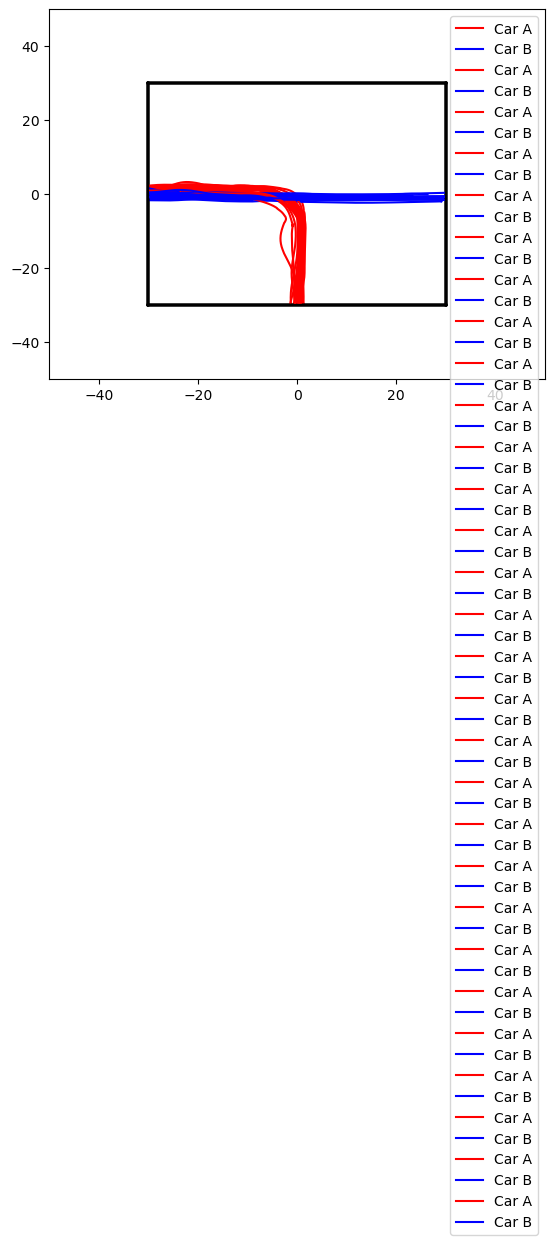

[40, 165, 170, 89, 53, 108, 214, 159, 53, 36, 72, 196, 109, 106, 138, 89, 94, 168, 102, 158, 127, 37, 158, 260, 108, 61, 105, 9999, 100, 85, 95]
[134, 100, 9999, 257, 78, 140, 62, 64, 87, 106, 85, 157, 59, 109, 75, 113, 74, 162, 214, 62, 65, 193, 107, 97, 67, 86, 93, 44, 90, 101, 245]
['A', 'B', 'A', 'A', 'A', 'A', 'B', 'B', 'A', 'A', 'A', 'B', 'B', 'A', 'B', 'A', 'B', 'B', 'A', 'B', 'B', 'A', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'A', 'A']
Car A crossed first: 15, Car B crossed first: 16
Percentage of Car A crossing first: 48.38709677419355%
Percentage of Car B crossing first: 51.61290322580645%


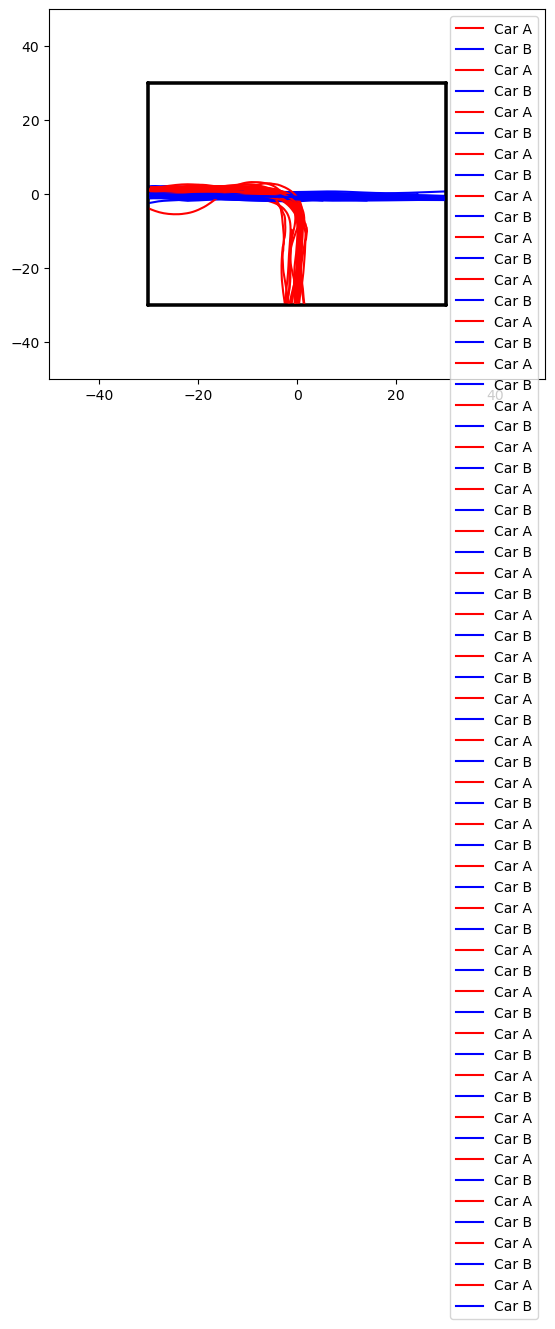

In [70]:
def FirstCrossAnalysis(CPlist, initial_pos_A, initial_pos_B, center_A, center_B):
    
    def GetFirstTimeGreaterLessThanX(greater_less = "greater", x = 0, posList = None):
        if greater_less == "greater":
            for i in range(len(posList)):
                if posList[i] > x:
                    return i
        elif greater_less == "less":
            for i in range(len(posList)):
                if posList[i] < x:
                    return i
    
    car_A_cross_times = []
    car_B_cross_times = []

    for csv_file in CPlist:
        dfA, dfB = Utilities.GetTruncatedScenario(csv_file, 30)
        x_positions_A = []
        for x in dfA['HeadPosXA']:
            x_positions_A.append(x)

        z_positions_A = []
        for z in dfA['HeadPosZA']:
            z_positions_A.append(z)

        x_positions_B = []
        for x in dfB['HeadPosXB']:
            x_positions_B.append(x)

        z_positions_B = []
        for z in dfB['HeadPosZB']:
            z_positions_B.append(z)       

        print


        if initial_pos_A == "bottom":
            first_cross_index_A = GetFirstTimeGreaterLessThanX("greater", center_A, z_positions_A)
        elif initial_pos_A == "top":
            first_cross_index_A = GetFirstTimeGreaterLessThanX("less", center_A, z_positions_A)
        elif initial_pos_A == "left":
            first_cross_index_A = GetFirstTimeGreaterLessThanX("greater", center_A, x_positions_A)
        elif initial_pos_A == "right":
            first_cross_index_A = GetFirstTimeGreaterLessThanX("less", center_A, x_positions_A)
        car_A_cross_times.append(first_cross_index_A)

        if initial_pos_B == "bottom":
            first_cross_index_B = GetFirstTimeGreaterLessThanX("greater", center_B, z_positions_B)
        elif initial_pos_B == "top":
            first_cross_index_B = GetFirstTimeGreaterLessThanX("less", center_B, z_positions_B)
        elif initial_pos_B == "left":
            first_cross_index_B = GetFirstTimeGreaterLessThanX("greater", center_B, x_positions_B)
        elif initial_pos_B == "right":
            first_cross_index_B = GetFirstTimeGreaterLessThanX("less", center_B, x_positions_B)
        car_B_cross_times.append(first_cross_index_B)




    crossing_comparison = []
    for i in range(len(car_A_cross_times)):
        # prevent none type error
        if car_A_cross_times[i] == None and car_B_cross_times[i] == None:
            # print the csv file that has none type error
            print(CPlist[i])
            continue

        if car_A_cross_times[i] == None:
            car_A_cross_times[i] = 9999
        
        if car_B_cross_times[i] == None:
            car_B_cross_times[i] = 9999

        if car_A_cross_times[i] < car_B_cross_times[i]:
            crossing_comparison.append("A")
        else:
            crossing_comparison.append("B")
    print(car_A_cross_times)
    print(car_B_cross_times)
    print(crossing_comparison)

    # print count of A and B
    print(f"Car A crossed first: {crossing_comparison.count('A')}, Car B crossed first: {crossing_comparison.count('B')}")
    print(f"Percentage of Car A crossing first: {crossing_comparison.count('A') / len(crossing_comparison) * 100}%")
    print(f"Percentage of Car B crossing first: {crossing_comparison.count('B') / len(crossing_comparison) * 100}%")

# Crossing Conditions: Using the 3D graph, find the midpoint between general stopping points and 0,0 
# CP1 (bottom, top) carA: X > -5 ; carB: Z < 4   --  "bottom", "top", -5, 4
# CP2 (bottom, left) carA: Z > -2 ; carB: X > -3  --  "bottom", "left", -2, -3

def AnalyzeCP(CP_num, direction_A, direction_B, center_A, center_B):
    CPlist_NYC, CPlist_ITH, CPlist_ISR = SetCPList(CP_num)
    FirstCrossAnalysis(CPlist_NYC, "bottom", "left", center_A, center_B)
    for csv_file in CPlist_NYC:
        plt = Utilities.DrawIntersectionFromPath(csv_file, 30)
    plt.show()

    FirstCrossAnalysis(CPlist_ISR, "bottom", "left", center_A, center_B)
    for csv_file in CPlist_ISR:
        plt = Utilities.DrawIntersectionFromPath(csv_file, 30)
    plt.show()
    
AnalyzeCP(2,"bottom", "left", -10, -10)
